In [58]:
import feedparser
import pandas as pd
from datetime import datetime
import urllib.parse
import time
from collections import Counter
import matplotlib.pyplot as plt

In [59]:
def fetch_arxiv_papers(categories, max_results=100):
    
    base_url = "http://export.arxiv.org/api/query?"
    raw_query = " OR ".join([f"cat:{cat}" for cat in categories])
    encoded_query = urllib.parse.quote(raw_query)

    search_query = f"search_query={encoded_query}&start=0&max_results={max_results}&sortBy=submittedDate&sortOrder=descending"
    feed_url = base_url + search_query

    print(f"Fetching from: {feed_url}")
    feed = feedparser.parse(feed_url)

    papers = []
    for entry in feed.entries:
        time.sleep(3)
        primary_cat = entry.arxiv_primary_category['term']
        if primary_cat not in categories:
            continue
        paper = {
            "title": entry.title.strip().replace('\n', ' '),
            "abstract": entry.summary.strip().replace('\n', ' '),
            "primary_category": primary_cat
        }
        papers.append(paper)
    
    return pd.DataFrame(papers)


In [ ]:
categories = ['gr-qc', 'hep-th', 'hep-ph']
df = fetch_arxiv_papers(categories, 2000)
now = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_path = f"arxiv_physics_{now}.csv"
df.to_csv(output_path, index=False)
print(f"Saved {len(df)} papers to {output_path}")

Fetching from: http://export.arxiv.org/api/query?search_query=cat%3Agr-qc%20OR%20cat%3Ahep-th%20OR%20cat%3Ahep-ph&start=0&max_results=2000&sortBy=submittedDate&sortOrder=descending


In [ ]:
df['primary_category'].unique()

array(['hep-ph', 'hep-th', 'gr-qc'], dtype=object)

<Axes: xlabel='primary_category'>

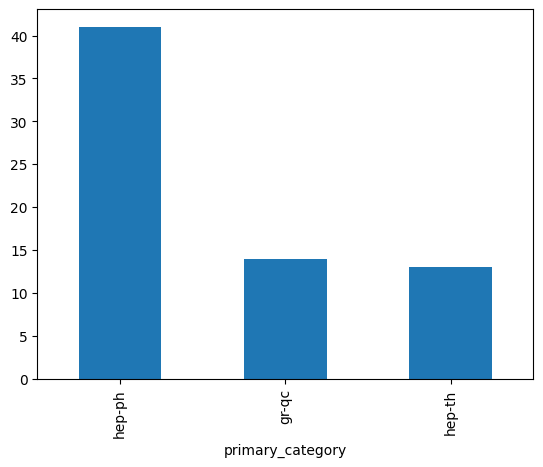

In [ ]:
df['primary_category'].value_counts().plot(kind='bar')